# 1.Obtain

In [2]:
from sklearn import datasets
import numpy as np
import pandas as pd
import sklearn

In [3]:
diabetes = datasets.load_diabetes()

In [4]:
type(diabetes)

sklearn.utils._bunch.Bunch

In [5]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [6]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [7]:
X, y = datasets.load_diabetes(return_X_y = True)

df_X, df_y = datasets.load_diabetes(return_X_y = True, as_frame = True)

df = pd.concat([df_X, df_y], axis = 1)

In [8]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


# 3.Explore

## 3.1 Aproach visual

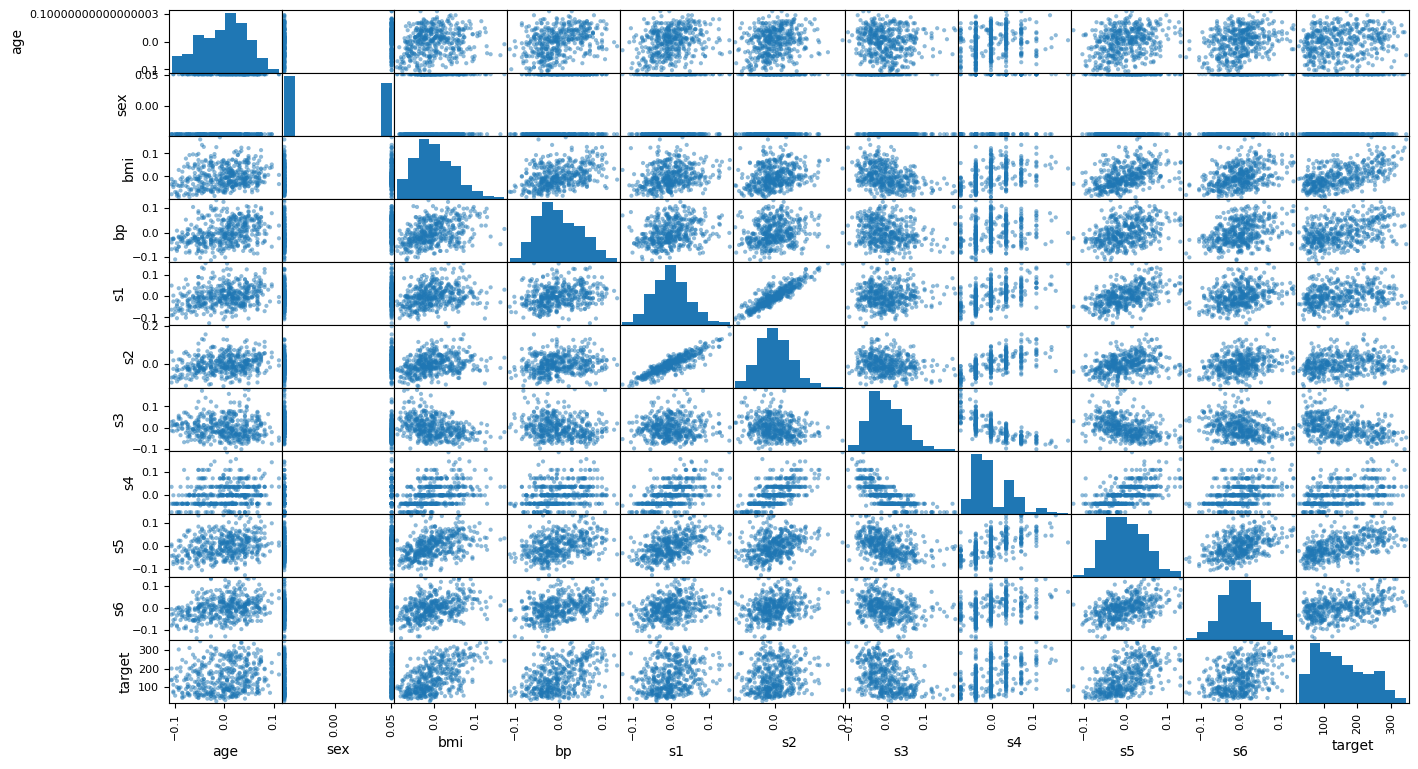

In [9]:
pd.plotting.scatter_matrix(df, figsize=(16, 9));

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector,

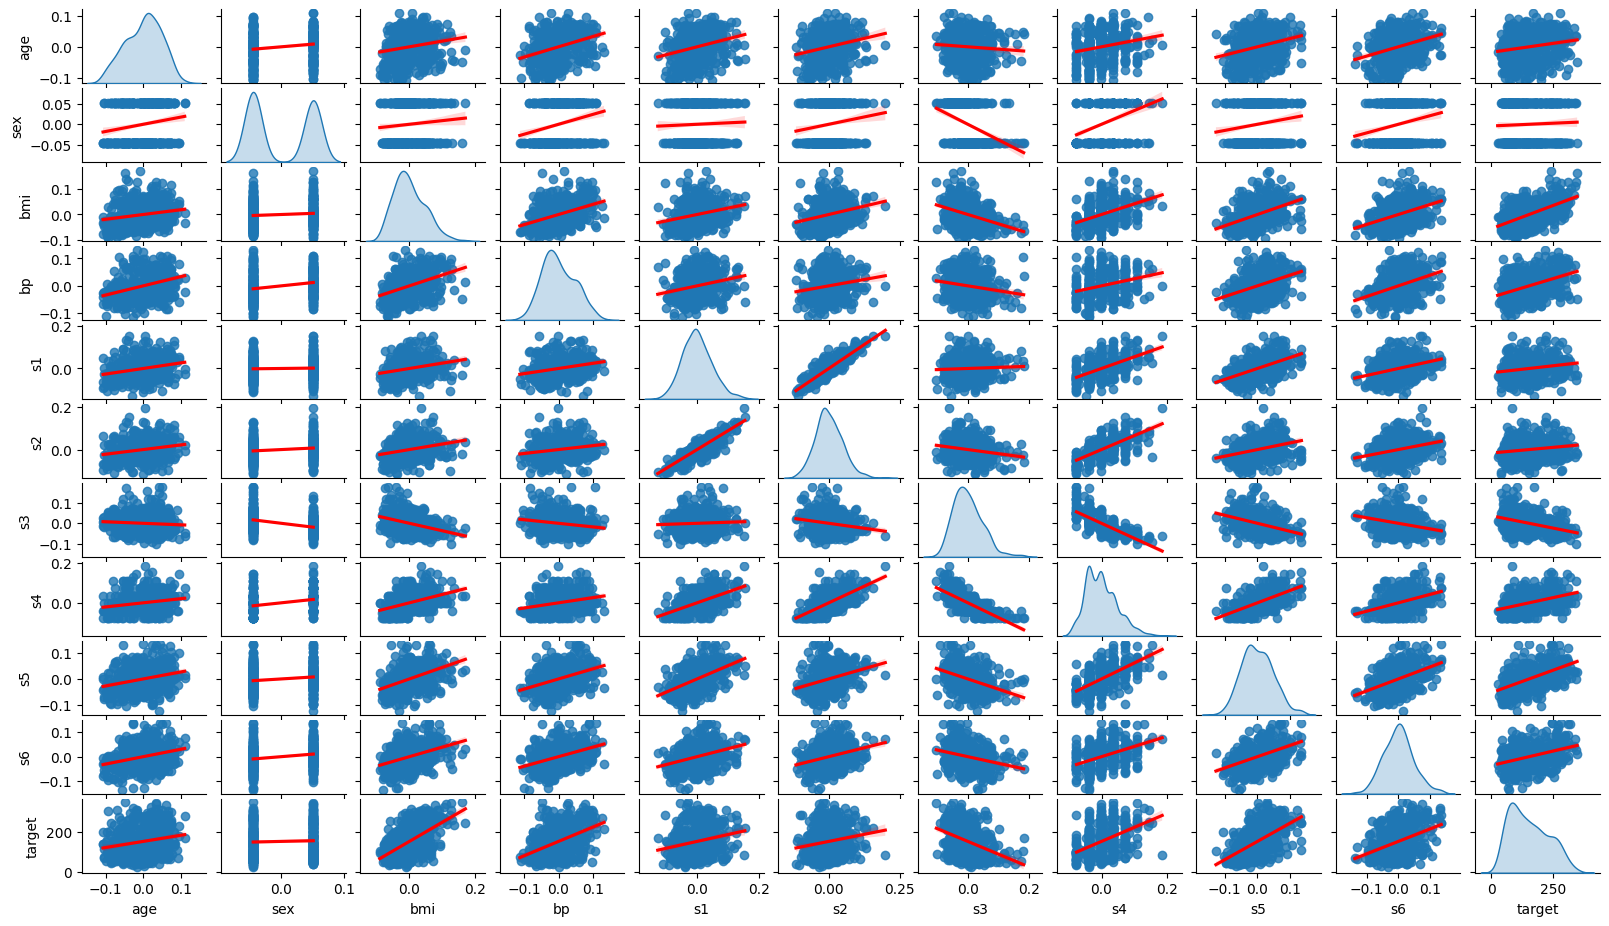

In [ ]:
import seaborn as sns

g = sns.pairplot(df,
                 diag_kind ="kde", # Para plasmar lineas de regresión en la propia visualización
                 kind ="reg",
                 diag_kws = dict(shade=True),
                 plot_kws={"line_kws":{"color":"red"}}
                 )

g.fig.set_size_inches(16, 9)

## 3.2 Correlation matrix

In [ ]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


<Axes: >

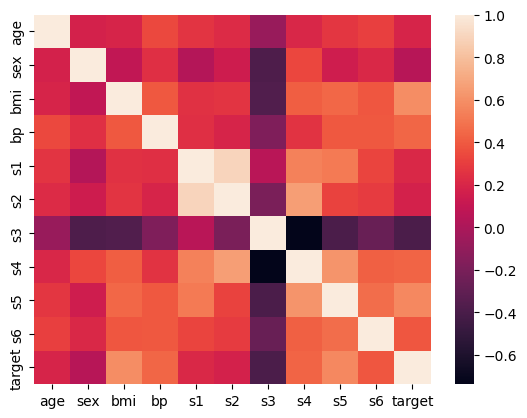

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

corr = df.corr()

sns.heatmap(corr)

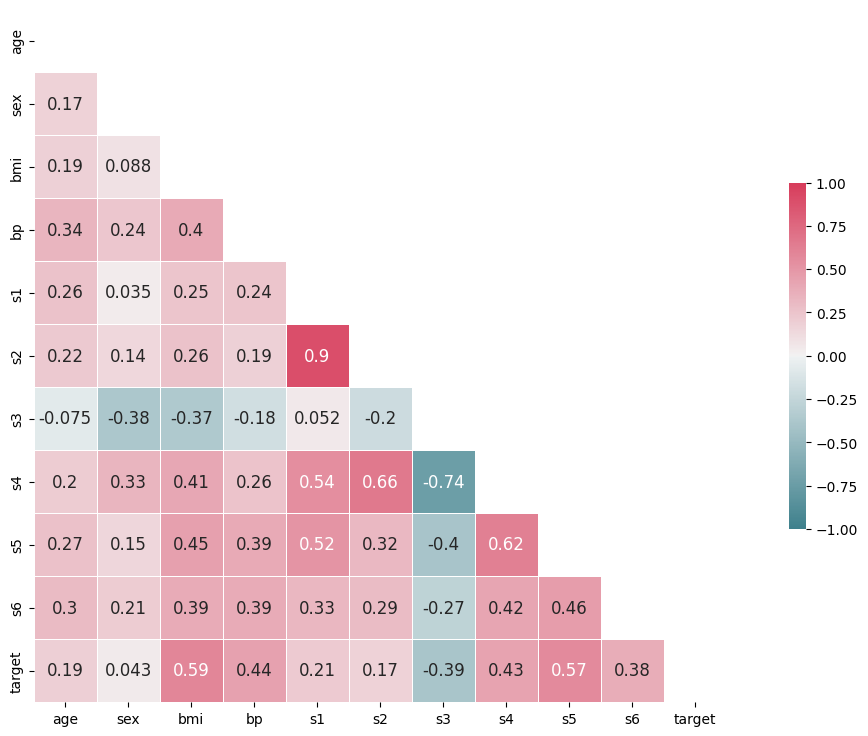

In [ ]:
# Vamos a mejorar la visualización

corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool)) # np.triu devuelve un array con los valores del triángulo superior de otro array de 2 dimensiones

fig = plt.figure(figsize=(16, 9))

cmap = sns.diverging_palette(210, 5, as_cmap=True) # Para indicar los colores de nuestro heatmap

sns.heatmap(corr, mask = mask, cmap = cmap,
            vmax = 1, vmin = -1, center = 0,
            annot = True, annot_kws={"size": 12},
            square = True, linewidths = .5,
            cbar_kws = {"shrink": .5} # Comprimir la barra de la leyenda para ver mejor a que color corresponde cada valor
            )

plt.show()

# 4.Model

In [10]:
# Separamos los datos a nivel horizontal
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state = 42, # Para que mi proyecto sea replicable. Que divida estos datos siempre de la misma manera. Para asignamos un seed o state. Se pone 42 porque es el "significado del universo"
                                                    test_size = 0.3)

In [12]:
print(X_train.shape, X_test.shape)

(309, 10) (133, 10)


In [13]:
print(y_train.shape, y_test.shape)

(309,) (133,)


## 4.1 Modelaje del algoritmo

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
linreg = LinearRegression() # Creamos la instancia

In [16]:
linreg.fit(X_train, y_train) # Entrenamos nuestro modelo. Ajustamos los datos de entrenamiento a la instancia del LinearRegression

LinearRegression()

In [17]:
y_pred = linreg.predict(X_test) # Nos devuelve los datos de nuestra target variable predichos en función de nuestros datos de testeto. Sería nuestra y_predict

y_pred

array([138.46970031, 181.10052342, 125.34400904, 292.75977277,
       123.8830531 ,  91.89830434, 257.26463123, 177.76169318,
        84.98549706, 109.15960992,  94.4855284 , 166.13235108,
        57.40742502, 206.13897354,  97.7811842 , 131.00472765,
       214.29789972, 252.52907661, 199.66656381, 219.49985634,
       203.23671317,  88.00656925,  70.65108459, 186.92233427,
       155.81266751, 162.81022205, 191.93135706, 184.72924276,
        46.62920829, 108.26566599, 178.14743952,  91.35065005,
       127.72125745, 184.04205666, 172.23799897, 189.51548863,
       121.83265708, 117.75339206, 145.67950306,  58.57563401,
        72.55421321, 107.27571105, 166.15280313, 153.29339984,
       165.19282154,  62.95752038,  73.58909449, 110.05656189,
        54.49723354, 164.88920632, 152.49472803,  63.8874565 ,
       111.4354561 , 108.34936269, 179.96973311, 158.70054112,
        95.04833555, 209.68990406, 118.37356519,  69.69946093,
       189.04680627, 204.99138626, 140.26840176, 105.75

# Construye una función que acepte una observación del Dataset y devuelva la predicción correspondiente.

In [31]:
def predict_lin_reg(df):
    while True:
        try:
            idx = int(input("Ingrese el índice de la observación (entre 0 y 441): "))
            if 0 <= idx <= 441:
                break
            else:
                print("El índice debe estar entre 0 y 441. Inténtalo de nuevo.")
        except ValueError:
            print("Por favor, ingresa un número válido.")

    test = df.drop("target", axis=1).iloc[[idx]]
    value_pred = linreg.predict(test)
    return value_pred


In [32]:
value = predict_lin_reg(df)

Ingrese el índice de la observación (entre 0 y 441): 500
El índice debe estar entre 0 y 441. Inténtalo de nuevo.
Ingrese el índice de la observación (entre 0 y 441): 600
El índice debe estar entre 0 y 441. Inténtalo de nuevo.
Ingrese el índice de la observación (entre 0 y 441): 128


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [33]:
print("La predicción para la observación seleccionada es:", value)

La predicción para la observación seleccionada es: [88.54061221]
